# Краткое введение в машинное обучение

Машинное обучение - это раздел ИИ, который изучает компьютерные алгоритмы по автоматическому извлечению знаний и алгоритмов решения задачи из существующих данных. Как правило, машинное обучение сводится и подбору **параметров модели**, чтобы она лучше решал данную задачу.

## Регрессия

Регрессия - это класс алгоритмов машинного обучения, в которых нам необходимо научиться предсказывать значение некоторой численной величины.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.compose
import sklearn.tree

В качестве пример рассмотрим датасет стоимости железнодорожных билетов между некоторыми европейскими городами:

In [21]:
df = pd.read_csv("../data/renfe-rail-sample.zip",compression='zip')
df

,Unnamed: 0,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,departure_hour,geodistance
0,37402744,37402745,renfe,MADRID,BARCELONA,2020-09-28,2020-09-28,2.83,AVE,Turista,108.90,Flexible,232.0,18,506.741151
1,37402745,37402746,renfe,MADRID,BARCELONA,2020-09-28,2020-09-28,2.50,AVE,Turista Plus,115.65,Promo +,40.0,19,506.741151
2,37402746,37402747,renfe,MADRID,BARCELONA,2020-09-28,2020-09-28,3.17,AVE,Turista,108.90,Flexible,177.0,20,506.741151
3,37402747,37402748,renfe,MADRID,BARCELONA,2020-10-10,2020-10-10,3.17,AVE,Turista,108.90,Flexible,279.0,7,506.741151
4,37402748,37402749,renfe,MADRID,BARCELONA,2020-10-10,2020-10-10,3.07,AVE,Turista,108.90,Flexible,238.0,9,506.741151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246671,38753055,38753056,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,1.85,AVE,Turista Plus,54.75,Promo +,15.0,18,256.506445
1246672,38753056,38753057,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,1.80,AVE,Turista,60.90,Flexible,215.0,18,256.506445
1246673,38753057,38753058,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,2.12,ALVIA,Turista,53.60,Flexible,20.0,19,256.506445
1246674,38753058,38753059,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,1.57,AVE,Turista,60.90,Flexible,29.0,19,256.506445


Разобьем весь датасет на обучающую и тестовую выборку:

In [22]:
df_train, df_test = sk.model_selection.train_test_split(df,train_size=0.8)

Попробуем использовать один параметр для прогнозирования - расстояние между городами. Для начала, изобразим это на графике:

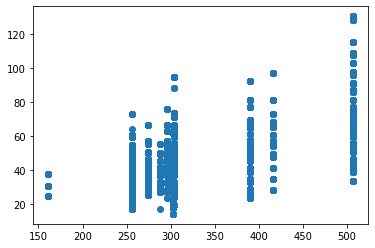

In [23]:
X = df_train["geodistance"]
Y = df_train["price"]
plt.scatter(X,Y)
plt.show()

### Линейная регрессия 

Линейная регрессия - простейшая модель, в которой функция предсказания цены будет линейной: $f_{a,b}(x) = ax+b$. Здесь $a$ и $b$ - параметры модели, которые необходимо подобрать.

В качестве функции ошибки возьмём среднеквадратичное отклонение, тогда ошибка

$$
L(a,b) = \sum_i (f_{a,b}(x_i)-y_i)^2 = \sum_i (ax_i+b-y_i)^2
$$

Для нахождения минимума ошибки найдём ноль производной:

$$
\begin{cases}
{\partial L\over\partial b} = \sum_i 2(ax_i+b-y_i) = 0 \cr
{\partial L\over\partial a} = \sum_i 2(ax_i+b-y_i)x_i = 0
\end{cases}
$$

Отсюда:
$$
\begin{cases}
a\sum x_i + nb  = \sum y_i \\
a\sum x_i^2 + b\sum x_i = \sum x_iy_i
\end{cases}
$$

Решая эту систему уравнения относительно $a$ и $b$, получаем:
$$
\begin{cases}
a = {\sum x_i\sum y_i - n\sum x_iy_i \over (\sum x_i)^2 - n\sum x_i^2} \\
b = {\sum y_i\sum x_i^2 - \sum x_i\sum x_iy_i \over \sum x_i^2(n - \sum x_i) }
\end{cases}
$$

Такой подход к аналитическому решению уравнений называется **методом наименьших квадратов**.

In [24]:
n = len(X)
a = (X.sum()*Y.sum()-n*(X*Y).sum())/(X.sum()*X.sum()-n*(X*X).sum())
b = (Y.sum()*(X*X).sum()-X.sum()*(X*Y).sum())/(X*X).sum()/(n-X.sum())
print(f"a={a}, b={b}")

a=0.15124256798920652, b=-0.0006840991903255061


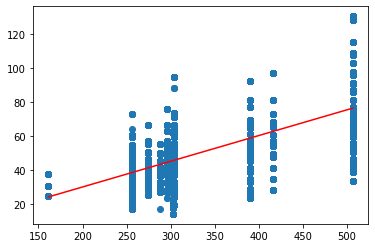

In [25]:
plt.scatter(X,Y)
lX = [X.min(),X.max()]
lY = [a*x+b for x in lX]
plt.plot(lX,lY,c='red')
plt.show()

Посчитаем ошибку на тестовой выборке. Типовые ошибки для регрессии (здесь за $y$ обозначено целевое значение, $\hat y$ - предсказанное значение):

* Среднеквадратичное отклонение (MSE, Mean Squared Error):

$$
{\mathrm MSE}(y,\hat y) = {1\over n}\sum_{i=1}^N (y_i-\hat y_i)^2
$$

* Средняя ошибка (MAE, Mean Absolute Error):

$$
{\mathrm MAE}(y,\hat y) = {1\over n}\sum_{i=1}^N |y_i-\hat y_i|
$$

* Относительная средняя ошибка (RMAE, Relative Mean Absolute Error) - показывает, в процентах, на сколько мы ошибаемся относительно среднего значения целевой величины $y$:

$$
{\mathrm RMAE}(y,\hat y) = {\sum_{i=1}^N |y_i-\hat y_i| \over \sum_{i=1}^N y_i}
$$

In [26]:
X_t, Y_t = df_test["geodistance"], df_test["price"]

def MSE(x,y):
    return np.mean(np.square(x-y)) 

def MAE(x,y):
    return np.mean(np.abs(x-y))

print(f"MSE={np.sqrt(MSE(a*X_t+b,Y_t))}, MAE={MAE(a*X_t+b,Y_t)}, MAE(%)={MAE(a*X_t+b,Y_t)/Y_t.mean()}")

MSE=16.37056415029646, MAE=13.682774323888395, MAE(%)=0.28622178981268437


Итак, мы научились предсказывать стоимость билета с ошибкой в 28%.

### Метод градиентного спуска

Метод наименьших квадратов может применяться для произвольного числа параметров модели. Однако на практике так не поступают, поскольку вычислительная сложность алгоритма слишком возрастает для большого числа переменных. Поэтому обычно используются методы оптимизации, такие, как метод градиентного спуска (**graident descent**).

Для начала устанавливают некоторые произвольные значение вектора параметров $a_0, b_0$. Далее, на каждом шаге считают ошибку (на всём датасете, или на его подмножества - в этом случае алгоритм называется **stochastic gradient descent**, SGD), и корректируют веса следующим образом:
$$\begin{cases}
a^{(i+1)} = a^{(i)} - \eta{\partial L\over\partial a} \\
b^{(i+1)} = b^{(i)} - \eta{\partial L\over\partial b} \\
\end{cases}$$

Здесь $\eta$ - некоторая величина, называемая **скоростью обучения** (learning rate).

Используя среднеквадратичную ошибку
$$
MSE = {1\over n}\sum_i(aX_i+b-Y_i)^2
$$
производные считаем вручную:
$$\begin{cases}
{\partial L\over\partial a} = {2\over n} \sum_i (aX_i+b-Y_i)*X_i \\
{\partial L\over\partial b} = {2\over n} \sum_i (aX_i+b-Y_i)
\end{cases}$$

In [29]:
a,b = np.random.normal(size=2)
eta = 0.000005
for i in range(10):
    print(f"Epoch {i}: MSE={MSE(a*X+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((a*X+b-Y)*X).mean(), b-eta*(a*X+b-Y).mean()

Epoch 0: MSE=900.4991326400789
Epoch 1: MSE=418.7514742595349
Epoch 2: MSE=300.53610345515983
Epoch 3: MSE=271.52740207880333


Epoch 4: MSE=264.40899804967114
Epoch 5: MSE=262.66222285893144
Epoch 6: MSE=262.2335840043763
Epoch 7: MSE=262.1284007460057
Epoch 8: MSE=262.1025897939199
Epoch 9: MSE=262.0962558985785


Посмотрим на результаты:

MSE=263.86414177357, MAE=13.598130394922354, MAE(%)=0.2844511739805471


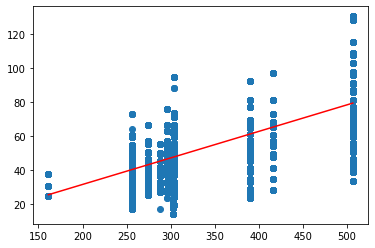

In [30]:
print(f"MSE={MSE(a*X_t+b,Y_t)}, MAE={MAE(a*X_t+b,Y_t)}, MAE(%)={MAE(a*X_t+b,Y_t)/Y_t.mean()}")
plt.scatter(X,Y)
lX = [X.min(),X.max()]
lY = [a*x+b for x in lX]
plt.plot(lX,lY,c='red')
plt.show()

Видим, что результаты аналогичны методу наименьших квадратов. 

> **ВАЖНО**: Успешность метода сильно зависит от выбора параметра $\eta$. Попробуйте уменьшить или увеличить значение $\eta$ на порядок, и посмотрите на результаты.

### Добавляем параметры

Добавим другие численные параметры:

In [31]:
X = df_train[["geodistance","duration","departure_hour"]]
X_t = df_test[["geodistance","duration","departure_hour"]]

*a, b = np.random.normal(size=4)
a = np.array(a)
eta = 0.000005
for i in range(10):
    print(f"Epoch {i}: MSE={MSE(X@a+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((X@a+b-Y)*X.T).mean(axis=1), b-eta*(X@a+b-Y).mean()

Epoch 0: MSE=164192.92414618027
Epoch 1: MSE=40359.7051149473
Epoch 2: MSE=10073.07182092754
Epoch 3: MSE=2665.687482894366
Epoch 4: MSE=854.0181425869642
Epoch 5: MSE=410.9263459767398
Epoch 6: MSE=302.55575914174875
Epoch 7: MSE=276.0499441702623
Epoch 8: MSE=269.56628705736836
Epoch 9: MSE=267.97956916928104


In [32]:
a,b

(geodistance       0.146924
 duration          0.417555
 departure_hour    0.154467
 dtype: float64,
 0.006972085011788341)

In [33]:
np.mean(np.abs(X_t@a+b-Y_t))

13.739698665804218

### Категориальные признаки

Наверное, основной вклад в предсказание цены вносят такие параметры, как класс или используемый тариф:

In [34]:
df["fare"].value_counts()

Promo +       566980
Flexible      422474
Adulto ida    257222
Name: fare, dtype: int64

Построим среднее значение цены в зависимости от тарифа:

<AxesSubplot:xlabel='fare'>

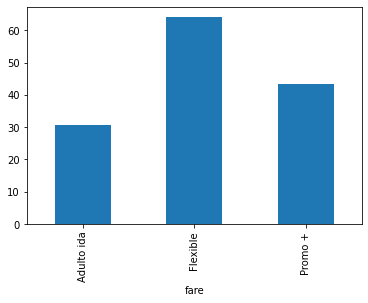

In [35]:
df.groupby('fare').mean()['price'].plot(kind='bar')

Для представления категориальных признаков, можно использовать различные подходы:
* Простой **Label Encoding**, когда каждое уникальное значение заменяется соответствующим численным значением. Этот способ хорошо использовать тогда, когда категориальные значения некоторым образом логически упорядочены, например оценки **удовлетворительно**, **хорошо** и **отлично** можно заменять цифрами 1, 2 и 3 соответственно - это отражает логическую зависимость в данных. Такой подход нельзя применять для неупорядоченных значений, например, цветов - в этом случае мы вносим дополнительные зависимости в данные, которых там не было.
* **One-Hot Encoding**, в котором для каждого значения заводится отдельный столбец из нулей или единиц. Например, для цветов, красный может представляться вектором (1,0,0,0,0,0,0), а зелёный: (0,0,0,1,0,0,0).
* Есть и другие способы кодирования, описанные [в этой заметке](https://habr.com/ru/post/666234/)

В нашем случае, мы можем использовать оба подхода. С учётом построенного выше графика, тарифы можно расположить в порядке возрастания цены: Adulto, Promo+, Flexible - и закодировать соответственно цифрами 0, 1 и 2. Либо использовать one-hot encoding. 

Попробуем использовать one-hot encoding. В `pandas` можно использовать фукнцию `get_dummies`:

In [36]:
pd.get_dummies(df["fare"])

,Adulto ida,Flexible,Promo +
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1246671,0,0,1
1246672,0,1,0
1246673,0,1,0
1246674,0,1,0


In [37]:
X = pd.get_dummies(df_train,columns=["fare"])[['geodistance','fare_Adulto ida','fare_Promo +','fare_Flexible']]
X

,geodistance,fare_Adulto ida,fare_Promo +,fare_Flexible
803801,303.180694,0,1,0
874990,296.103026,0,0,1
507031,296.103026,0,0,1
832231,303.573264,0,1,0
1152766,161.318295,1,0,0
...,...,...,...,...
835649,303.180694,1,0,0
559118,296.103026,0,0,1
1138171,303.180694,0,1,0
628834,161.318295,1,0,0


In [38]:
*a, b = np.random.normal(size=5)
a = np.array(a)
eta = 0.000005
for i in range(20):
    print(f"Epoch {i}: MSE={MSE(X@a+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((X@a+b-Y)*X.T).mean(axis=1), b-eta*(X@a+b-Y).mean()

Epoch 0: MSE=10349.80416681686
Epoch 1: MSE=2737.6145665426657
Epoch 2: MSE=869.6832173081267
Epoch 3: MSE=411.3171205805728
Epoch 4: MSE=298.8397555708185
Epoch 5: MSE=271.2389257305559
Epoch 6: MSE=264.465678760461
Epoch 7: MSE=262.80324607106036
Epoch 8: MSE=262.3949398359052
Epoch 9: MSE=262.2943797013367
Epoch 10: MSE=262.26933640685473
Epoch 11: MSE=262.26282394892917
Epoch 12: MSE=262.26085871668676
Epoch 13: MSE=262.2600093135414
Epoch 14: MSE=262.25943372090313
Epoch 15: MSE=262.25892532213044
Epoch 16: MSE=262.25843341050324
Epoch 17: MSE=262.2579455461884
Epoch 18: MSE=262.257458678
Epoch 19: MSE=262.2569720533306


Видим, что точность при использовании дополнительных данных несколько повышается! Это связано с тем, что мы добавляем дополнительную информацию, которая является важной при определении цены билета.

Мы можем посмотреть на коэффициенты при различных тарифах, чтобы сделать выводы о том, как они влияют на цену билета. В этом смысле модель является **интерпретируемой**:

In [39]:
a

geodistance        0.162999
fare_Adulto ida   -0.362477
fare_Promo +      -0.251341
fare_Flexible     -0.170865
dtype: float64

## Scikit Learn

Стандартом де факто для классического машинного обучения является библиотека [Scikit Learn](https://scikit-learn.org/stable/index.html). Реализуем линейную регрессию с помощью этой библиотеки. Для начала, выделим значимые численные и категориальные признаки:

In [40]:
numeric = ['geodistance','duration','departure_hour']
categorical = ['vehicle_type','vehicle_class','fare']

Для обучения линейной регрессии на числовых признаках, используем следующий код:

In [41]:
X = df_train[numeric]
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)

Основной метод для обучения модели - `fit`. По-английски подбор параметров модели называется *fitting the model*, поскольку мы подбираем такие значения параметров, которые минимизируют ошибку.

Вычислим точность на тестовой выборке:

In [42]:
X_t = df_test[numeric]
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=225.52447171991832, MAE=11.998214649914614, MAE(%)=0.2896441178399961


Можем посмотреть коэффициенты модели:

In [43]:
print(f"Coefficients={model.coef_}, bias={model.intercept_}")

Coefficients=[ 0.175531   -3.96804879  0.19978638], bias=2.068332673176087


Для кодирования признаков, также можно использовать механизм Scikit Learn. Соответствующие объекты называюется **Encoder**. Вот как мы можем использовать энкодеры:

In [44]:
ohe = sk.preprocessing.OneHotEncoder()
ohe.fit(df[["fare","vehicle_class"]])
print(ohe.categories_)
ohe.transform(df[["fare","vehicle_class"]]).toarray()[:10]

[array(['Adulto ida', 'Flexible', 'Promo +'], dtype=object), array(['Turista', 'Turista Plus', 'Turista con enlace'], dtype=object)]


array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]])

Для того, чтобы применить различные энкодеры к различным полям, существует удобный механизм трансформеров. Например, получим таблицу с нужными нам полями, описав преобразователи для всех категориальных полей:

In [45]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.OneHotEncoder(),['fare']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_class']),
    remainder='passthrough'
)
X = transformer.fit_transform(df_train[numeric+categorical])
X.toarray()[:2]

array([[  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        , 303.1806944 ,   2.67      ,  11.        ],
       [  0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        , 296.10302597,   1.8       ,  18.        ]])

Полученные значения можно использовать для обучения модели:

In [46]:
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)
X_t = transformer.transform(df_test[numeric+categorical])
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=75.59497730452095, MAE=6.0551592787638295, MAE(%)=0.1404797527520487


### Нормализация значений

Для того, чтобы модель не отдавала предпочтение некоторым из признаков, обычно прибегают к масштабированию признаков. Поскольку one-hot encoding даёт нам признаки, находящиеся в диапазоне от 0 до 1, то и остальные признаки имеет смысл приводить к примерно такому же диапазону.

В SkLearn удобно использовать два вида нормализации:
* `MinMaxScaler` - преобразует значения строго к диапазону 0-1, вычитая минимальное значение, и деля на интервал между максимальным и минимальным.
* `StandardScaler` - вычитает из значений среднее и делит на дисперсию

Мы можем встроить нормализацию в наш конвейер предобработки:


In [47]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.StandardScaler(),['geodistance']),
    (sk.preprocessing.StandardScaler(),['duration']),
    (sk.preprocessing.StandardScaler(),['departure_hour']),
    (sk.preprocessing.OneHotEncoder(),['fare']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_class']),
)
X = transformer.fit_transform(df_train[numeric+categorical])
X.toarray()[:2]

array([[ 0.01428989,  0.09904343, -0.52467308,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [-0.05696662, -0.44282536,  1.02594599,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ]])

In [48]:
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)
X_t = transformer.transform(df_test[numeric+categorical])
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=75.59497730461322, MAE=6.055159278903061, MAE(%)=0.14047975276264854


### Добавление атрибутов

Иногда, результат может зависеть от входных признаков нелинейно. Например, количество оставшихся денег на счете в случае со сложными процентами скорее всего будет зависеть от времени экспоненциально. В этом случае мы можем улучшить точность можели, заменив входное значение его логарифмом.

Аналогичным образом можно пытаться добавлять в исходный датасет различные функции от входных переменных или их комбинаций, которые становятся новыми признаками в линейной модели. Один из подходов, который позволяет отслеживать зависимость результата от комбинаций признаков, является добавление полиномиальных признаков. Например, если исходный датасет включает в себя признаки $x_1, x_2, x_3$, то добавляя все полиномиальные признаки степени 2, получим $x_1^2, x_2^2, x_3^2, x_1x_2, x_1x_3, x_2x_3$, вдобавок к исходным признакам.

Добавление полиномиальных комбинаций признаков можно сделать с помощью трансформера:

In [49]:
poly = sk.preprocessing.PolynomialFeatures()
Xp = poly.fit_transform(X)
X.shape,Xp.shape

((997340, 24), (997340, 325))

Видим, что из 24 признаков мы получили 325!

Обучаем модель на расширенном наборе признаков:

In [50]:
model.fit(Xp,Y)

Xp_t = poly.transform(X_t)
Yp_t_pred = model.predict(Xp_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Yp_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Yp_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Yp_t_pred)}")

MSE=50.52062617252084, MAE=4.635986327119416, MAE(%)=0.10993387702220828


### Используем пайплайны

В нашем последнем примере мы сначала использовали `ColumnTransformer` чтобы закодировать нечисловые значения, а затем `PolynomialFeatures` для добавления полиномиальных признаков, после чего подавали полученные данные на вход модели `LinearRegression` для обучения.

Мы можем объединить эти шаги в единый **конвейер** (или **пайплайн**), поскольку все элементы этого конвейера имеют единый интерфейс в виде методов `fit` и `fit_transform`:

In [51]:
pipe = sk.pipeline.Pipeline([
    ('ColumnTransform',transformer),
    ('PolyFeatures',poly),
    ('LinearModel',model)
])
pipe.fit(df_train[numeric+categorical],Y)
pipe.score(df_test[numeric+categorical],Y_t)

0.896764055025557

Таким образом, с помощью нескольких строчек кода мы построили конвейер предобработки данных, обучили модель, и проверили её метрику качества (accuracy). 

### Деревья решений

В нашем случае понятно, что цены на билеты в зависимости от тарифа могут меняться скачкообразно, т.е. для каждого тарифа могут применяться свои правила ценообразования. Для таких случаев можно использовать другой алгоритм машинного обучения - **деревья решений**. Дерево решений смотрит на некоторый признак, и в зависимости от его значения рассматривает два и более вариантов решений. В каждом из вариантов выбирается другой признак, и так далее.

Попробуем обучить алгоритм дерева решений на наших данных:

In [52]:
model = sk.tree.DecisionTreeRegressor()
model = model.fit(X,Y)

Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=33.5933221452845, MAE=2.852745779495959, MAE(%)=0.07110442930312798


Как видим, использование деревьев дает нам весьма высокую точность!

Деревья также являются интерпретируемой моделью, однако визуализация большого дерева не слишком наглядна. Для наглядности, ограничим глубину обучаемого дерева - это снизит точность, но позволит нам визуализировать дерево более наглядно: 

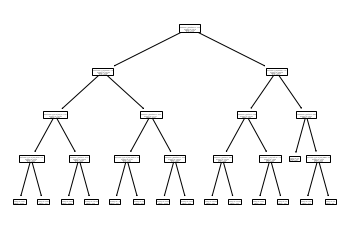

In [53]:
model = sk.tree.DecisionTreeRegressor(max_depth=4)
model = model.fit(X,Y)

z = sk.tree.plot_tree(model,feature_names=transformer.get_feature_names_out())

Для более качественного отображения имеет смысл использовать библиотеку **GraphViz**. Её необходимо установить с помощью `conda install python-graphviz` в ваше окружение.

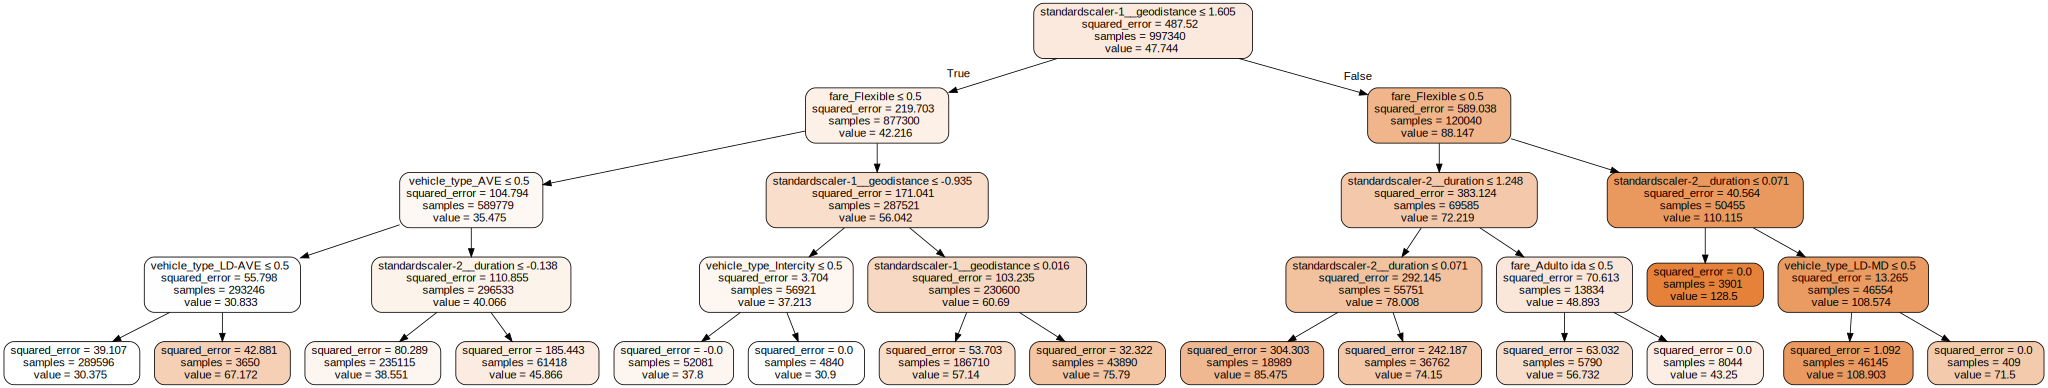

In [54]:
import graphviz
graphviz.backend.dot_command.DOT_BINARY = 'c:/winapp/conda/Library/bin/graphviz/dot.exe'

def proc_feature_name(x):
    return x.replace('onehotencoder-1__','')\
        .replace('onehotencoder-2__','')\
        .replace('onehotencoder-3__','')\
        .replace('remainder__','')

feature_names = [proc_feature_name(x) for x in transformer.get_feature_names_out()]

graphviz.Source(
    sk.tree.export_graphviz(model,feature_names=feature_names,
    filled=True, rounded=True, special_characters=True)
)

## Классификация

Задача классификации ставится, когда необходимо разделить объекты в датасете на два или более классов. Можно сказать, что в рассмотренной нами задаче регрессии целевая переменная - числовая, а в задаче классификации - категориальная.

Обычно отдельно выделяют **бинарную** или **двоичную классификацию**, и **многоклассовую** (которая является более общим случаем бинарной). Многоклассовая классификация может быть сведена к двоичной путём построения нескольких классификаторов one-vs-all.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets

Чтобы посмотреть, как решается задача классификации, сгенерируем случайный датасет. Для наглядности будем использовать размерность задачи 2, чтобы можно было визуализировать картину на плоскости:

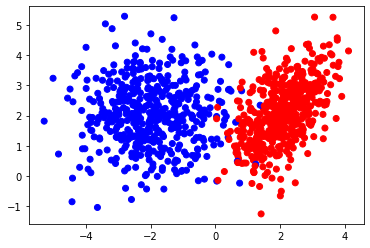

In [56]:
X,Y = sk.datasets.make_classification(
    n_samples=1000,n_features=2,random_state=13,
    n_informative=2,n_redundant=0,
    class_sep=2,n_clusters_per_class=1,flip_y=0)

plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
plt.show()

## Логистическая регрессия

Простейший линейный алгоритм решения задачи двоичной классификации - это **логистическая регрессия**. В ней используется линейная решающая функция $f_{W,b}(x)=Wx+b$, где $W$ - матрица весов (weights), $b$ - сдвиг (bias).

> **Замечание:** несмотря на название, логистическая регрессия решает задачу классификации!

Можно считать, что класс объекта определяется знаком решающей функции $f$. Поскольку в нашем датасете $y_i\in\{0,1\}$, предсказываемое значение $y={1\over2}(\mathrm{sign} f(x)+1)$. Говорят, что после линейного преобразования применяется **передаточная функция** $\sigma(x)={1\over2}(\mathrm{sign}(x)+1)$, а $y=\sigma(f(x))$.

In [ ]:
nx=np.linspace(-5,5)
plt.plot(nx,0.5*(np.sign(nx)+1))
plt.show()


Однако данная передаточная функция не является гладкой, а для использования метода градиентного спуска нам хотелось бы иметь дифференцируемую функцию. Поэтому обычно в качестве передаточной функции используют функцию **сигмоид** $$\sigma(x)={1\over1+e^{-x}}$$

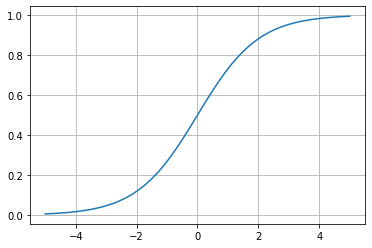

In [57]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-5,5)
plt.plot(x,sigmoid(x))
plt.grid()
plt.show()

Используем, как и в прошлый раз, метод градиентного спуска:

In [58]:
W = np.random.normal(size=(2,))
b = np.random.normal(size=(1,))

def mse_loss(W,b):
  return np.average(np.square(sigmoid(np.matmul(X,W)+b)-Y))

mse_loss(W,b)

0.3315514331281505

Производную в процессе градиентного спуска можно считать и численно. Так обычно не делают, поскольку для многомерного случая это слишком вычислительно сложный процесс, но для примера - попробуем так сделать. Опишем функцию численного дифференцирования:

In [59]:
def d(f,x,dx=0.1):
    n = x.shape[0]
    r = np.zeros_like(x)
    for i in range(n):
        dxc = np.eye(n)[i]*dx
        r[i] = (f(x+dxc)-f(x))/dx
    return r

d(lambda x: mse_loss(x,b),W) # производная по dW

array([-0.2443736 ,  0.14923962])

Цикл оптимизации выглядит также, как и в случае регрессии:

In [60]:
W = np.random.normal(size=(2,))
b = np.random.normal(size=(1,))

eta = 0.1
n = len(X)
for i in range(100):
    print(f"({W} {b}) -> loss={mse_loss(W,b)}")
    #print(f"dldw={dldw}, dldb={dldb}, W={W}, b={b}")

    dldw = d(lambda x: mse_loss(x,b),W)
    dldb = d(lambda x: mse_loss(W,x),b)
    h = sigmoid(np.matmul(X,W)+b)
    W-=eta*dldw
    b-=eta*dldb


([0.24175329 0.79971254] [1.39455406]) -> loss=0.4134915721902168
([0.25778365 0.79035233] [1.38813581]) -> loss=0.409636084972742
([0.27435547 0.78054289] [1.38148433]) -> loss=0.4054787613566924
([0.29149179 0.77025145] [1.37458698]) -> loss=0.4009904364967766
([0.3092148  0.75944292] [1.36743071]) -> loss=0.39613951320569835
([0.32754506 0.74807998] [1.36000222]) -> loss=0.39089208301330175
([0.3465006  0.73612325] [1.35228817]) -> loss=0.38521222006899886
([0.36609572 0.72353167] [1.34427546]) -> loss=0.37906251644779104
([0.38633952 0.71026302] [1.33595165]) -> loss=0.3724049420004921
([0.40723413 0.69627475] [1.32730547]) -> loss=0.36520212280677444
([0.42877267 0.68152518] [1.31832746]) -> loss=0.3574191333742017
([0.4509369  0.66597509] [1.30901078]) -> loss=0.34902587956662934
([0.47369477 0.64958973] [1.29935217]) -> loss=0.3400000995852861
([0.49699806 0.63234136] [1.28935302]) -> loss=0.3303309167946053
([0.52078027 0.61421222] [1.2790205]) -> loss=0.32002273483602006
([0.5

Посмотрим, как разделяющая прямая выглядит на графике. Уравнение разделяющей прямой имеет вид $w_0x+w_1y+b = 0$, где $x,y$ - переменные по осям абсцисс и ординат на графике, $w_0, w_1, b$ - веса модели. Отсюда получаем уравение прямой, выражая $y$ через $x$:
$$
y = {-b\over w_1}- {w_0\over w_1}x
$$

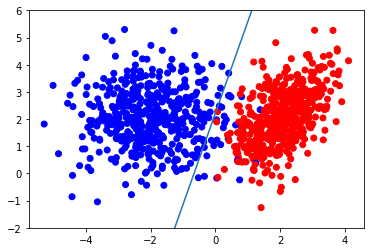

In [61]:
plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
xs = X[:,0].min(), X[:,0].max()
plt.plot(xs,[-b/W[1]-x*W[0]/W[1] for x in xs])
plt.ylim([-2,6])
plt.show()

Видно, что мы получили неплохую разделяющую прямую, но если мы попробуем запустить процесс несколько раз то увидим, что он не всегда хорошо сходится. Это происходит потому, что функция потерь MSE для задач классификации находится в пределах 0-1, поскольку худшее, что может случиться - это мы неправильно угадаем класс. Иными словами, сигмоид как передаточная функция теряет информацию о том, насколько сильно мы ошиблись - из-за того, что он асимптотически быстро стремиться к 0 или к 1 при больших по модулю значениях линейной функции.

Для того, чтобы компенсировать это, в качестве функции ошибки для задач регрессии используют логарифмическую функцию потерь. Например, если ожидаемый класс $\hat y=1$, а на выходе нашей модели (после сигмоиды) мы получаем значение $y=0.1$, то ошибка будет равна $-\log 0.1\approx 2.3$. А при стремлении решающей функции к 0 логарифм вообще будет неограниченно возрастать! Если же мы угадали с классом и предсказали значение 1, то ошибка будет равна нулю.

> Выход решающей функции (после сигмоиды) можно рассматривать как **вероятность** того, что ожидаемый класс - 1. 


In [ ]:
nx = np.linspace(0.1,5)/5
plt.plot(nx,-np.log(nx))
plt.show()


Аналогично, для ожидаемого класса $\hat y=0$ ошибка будет равна $-\log(1-y)$, где $y$ - выход решающей функции. С учётом этого, если обозначить ожидаемый класс как $\hat y \in\{0,1\}$, то функция ошибки будет равна
$$
\mathrm{logloss}(y,\hat y) = \hat y\log y + (1-\hat y)\log(1-y)
$$

> Для более общего случая, когда мы имеем $n>2$ классов, вероятность появления $i$-го класса предсказана как $p_i$ ($\sum p_i=1$), при этом номер правильного класса - $\hat y$, логистическая функция ошибка равна $-\log p_{\hat y}$. 

$$
-\log p_{\hat y}
$$

Пробуем запустить оптимизацию с логистической функцией ошибки. В этом примере мы используем явно вычисленные производные ошибки по $W$ и $b$:

In [65]:
W = np.random.normal(size=(2,))
b = np.random.normal(size=(1,))

def loss(W, b):
    h = sigmoid(np.matmul(X,W)+b)
    return (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()

eta = 0.2
n = len(X)
for i in range(100):
    print(f"({W} {b}) -> loss={loss(W,b)}")
    #print(f"dldw={dldw}, dldb={dldb}, W={W}, b={b}")

    h = sigmoid(np.matmul(X,W)+b)
    dldw = np.matmul(X.T,h-Y.T)/n
    dldb = (h-Y.T).mean()
    W-=eta*dldw
    b-=eta*dldb


([ 0.17986149 -1.58424751] [0.36373518]) -> loss=1.4339268553131683
([ 0.38237329 -1.39573836] [0.44127818]) -> loss=1.037654945662465
([ 0.56517233 -1.22157537] [0.51122818]) -> loss=0.7176241216491868
([ 0.72033127 -1.07129879] [0.56972088]) -> loss=0.49202582959321045
([ 0.84369096 -0.95184857] [0.61471874]) -> loss=0.3532340413447129
([ 0.93883869 -0.8621028 ] [0.64754852]) -> loss=0.27322504585846363
([ 1.01340987 -0.79534933] [0.6713077]) -> loss=0.22610865907502486
([ 1.07403453 -0.7448252 ] [0.68877423]) -> loss=0.19657602957063472
([ 1.12513605 -0.70566325] [0.70186555]) -> loss=0.17678985951454498
([ 1.16949474 -0.67464414] [0.71182939]) -> loss=0.1627386414288599
([ 1.20888178 -0.64963702] [0.71948705]) -> loss=0.1522667228182285
([ 1.24446542 -0.62919381] [0.72539613]) -> loss=0.1441470685861977
([ 1.27704606 -0.61229892] [0.72994814]) -> loss=0.13764265072535412
([ 1.30719196 -0.5982185 ] [0.73342643]) -> loss=0.13228946113432252
([ 1.33531948 -0.586408  ] [0.73604166]) ->

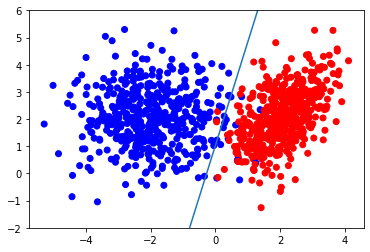

In [66]:
plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
xs = X[:,0].min(), X[:,0].max()
plt.plot(xs,[-b/W[1]-x*W[0]/W[1] for x in xs])
plt.ylim([-2,6])
plt.show()

## Классификация в SkLearn

Мы можем использовать библиотеку Scikit Learn для решения задач классификации. Разобьем на обучающую и проверочную выборки, и посмотрим на точность модели:

In [67]:
import sklearn.linear_model
import sklearn.preprocessing

X_train,X_test,Y_train,Y_test = sk.model_selection.train_test_split(X,Y,test_size=0.2)

model = sk.linear_model.LogisticRegression().fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print(f"Accuracy={sk.metrics.accuracy_score(Y_test,Y_pred)}")

Accuracy=0.985


Можно также предсказывать вероятности принадлежности классам:

In [68]:
model.predict_proba(X_test[:5])

array([[2.82755184e-02, 9.71724482e-01],
       [1.23195761e-03, 9.98768042e-01],
       [9.99998629e-01, 1.37075237e-06],
       [9.99595848e-01, 4.04152010e-04],
       [9.99998609e-01, 1.39140177e-06]])

Посмотрим, как выглядит разделяющая прямая:

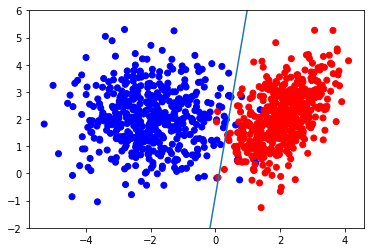

In [69]:
plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
xs = X[:,0].min(), X[:,0].max()
b = model.intercept_
W = model.coef_[0]
plt.plot(xs,[-b/W[1]-x*W[0]/W[1] for x in xs])
plt.ylim([-2,6])
plt.show()

Рассмотрим практическую задачу - классификацияю пассажиров Титаника. Для начала загрузим датасет:

In [70]:
import pandas as pd
df = pd.read_csv("../data/titanic.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,Zabour. Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Для начала нам необходимо проделать преобразование категориальных признаков в числовые, как мы рассматривали в прошлой лекции. В нашем случае, необходимо преобразовать пол, который является номинальным признаком. Поскольку значения всего два, не очень принципиально, использовать ли Label Encoding или One-Hot Encoding.

In [71]:
df["nsex"] = df['sex'].apply(lambda x: 0 if x=="male" else 1)

Также можно заметить, что некоторые значения возраста отсутствуют. Посмотрим, сколько таких строк:

In [72]:
df['age'].isna().sum()

263

У нас есть несколько вариантов, как быть с этим показателем:
* Убрать все строки, где есть отсутствующие значения. Это слишком дорогой способ, поскольку у нас значения отстуствуют в более, чем 10% строк.
* Убрать весь столбец `age` из рассмотрения. Также не очень хороший вариант
* Заполнить отсутствующие значения некоторыми другими, например, средним:

In [73]:
df['fage'] = df['age'].fillna(df['age'].mean())
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,nsex,fage
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO,1,29.000000
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON,0,0.916700
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,1,2.000000
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON,0,30.000000
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,1,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,14.500000
1305,3,0,Zabour. Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,29.881135
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,26.500000
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,27.000000


Теперь, когда мы очистили данные, можем извлечь интересующие нас признаки и разбить на обучающую и тестовую выборку:

In [74]:
features = ['pclass','nsex','fage','sibsp','parch']
X = df[features]
Y = df['survived']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y,test_size=0.2)

Обучаем модель:

In [75]:
model = sk.linear_model.LogisticRegression().fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print(f"Accuracy={sk.metrics.accuracy_score(Y_test,Y_pred)}")

Accuracy=0.7557251908396947


Чтобы поподробнее разобраться в том, как устроена ошибка, посмотрим на так называемую **матрицу ошибок** (*confusion matrix*):

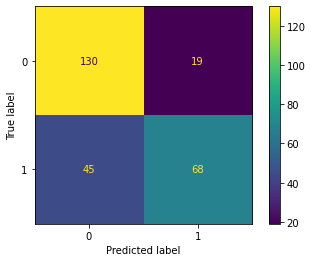

In [76]:
sk.metrics.ConfusionMatrixDisplay.from_estimator(model,X_test,Y_test)
plt.show()

Для классификации имеет смысл говорить также про другие метрики:

In [77]:
print(sk.metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       149
           1       0.78      0.60      0.68       113

    accuracy                           0.76       262
   macro avg       0.76      0.74      0.74       262
weighted avg       0.76      0.76      0.75       262



Посмотрим, как выглядит ROC-кривая для нашей модели и метрика AUC: 

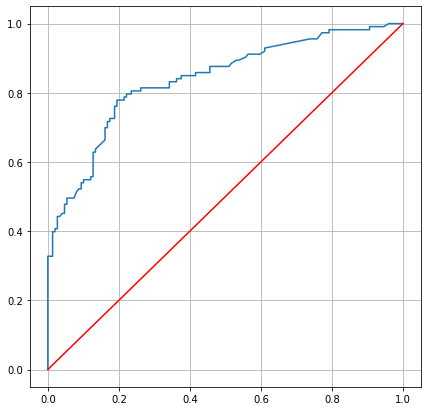

In [78]:
fpr, tpr, thresholds = sk.metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr)
plt.grid()
plt.plot([0,1],[0,1],c='r')

In [79]:
sk.metrics.auc(fpr,tpr)

0.8379758864405773

Попробуем интерпретировать линейную модель, посмотрев на коэффициенты:

In [80]:
list(zip(['pclass','nsex','fage','sibsp','parch'],model.coef_[0]))

[('pclass', -1.0261248217866363),
 ('nsex', 2.5562998370241616),
 ('fage', -0.03157148879423429),
 ('sibsp', -0.28680020953252316),
 ('parch', -0.01750761208735229)]

<BarContainer object of 5 artists>

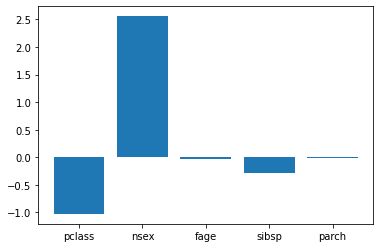

In [81]:
plt.bar(['pclass','nsex','fage','sibsp','parch'],model.coef_[0])

## Деревья решений

В отличие от линейных моделей, деревья решений хорошо работают для категориальных атрибутов. Простейший алгоритм построения дерева называется [ID3](https://ru.wikipedia.org/wiki/ID3_(%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC)).

Будем рассматривать только категориальные атрибуты нашей модели - пол (`sex`) и класс (`pclass`). Добавим для интереса ещё один категориальный атрибут: возраст:


In [83]:
df['agecat'] = df['fage'].apply(lambda x: "young" if x<18 else "old" if x>45 else "middle")

Предположим, мы хотим предсказывать вероятность выживания только на основе пола. В этом случае, средняя вероятность равна:

In [84]:
for s in df['sex'].unique():
    print(f"Probability for sex={s} is {df[df['sex']==s]['survived'].mean()}")

Probability for sex=female is 0.7274678111587983
Probability for sex=male is 0.19098457888493475


Т.е. мы можем предсказывать "выжил" для всех женщин, и "не выжил" для все мужчин - и это будет давать нам некоторую точность предсказания.

Но вдруг было бы правильнее сначала смотреть не на пол, а на класс? Посмотрим, какая точность была бы у результирующей модели, если бы мы выбрали в качестве решающего атрибута пол, класс или возрастную категорию:

In [85]:
def accuracy_by_attr(df,attr):
    p = {}
    for k in df[attr].unique():
        p[k] = int(df[df[attr]==k]['survived'].mean()>=0.5)
    return df.apply(lambda x: p[x[attr]]==x['survived'],axis=1).mean()

for a in ['pclass','sex','agecat']:
    print(f"Accuracy by {a} = {accuracy_by_attr(df,a)}")

Accuracy by pclass = 0.6768525592055004
Accuracy by sex = 0.7799847211611918
Accuracy by agecat = 0.6241405653170359


Таким образом, выгоднее всего сначала смотреть на пол пассажира. Далее, разделяем датасет на два подмножества, и для каждого из них повторяем этот процесс. Например, вот как будет выглядеть точность для мужчин и женщин, если смотреть далее на атрибут `pclass`:

In [86]:
for sex in ['male','female']:
    df_1 = df[df['sex']==sex]
    print(f"{sex}, accuracy by pclass = {accuracy_by_attr(df_1,'pclass')}")

male, accuracy by pclass = 0.8090154211150652
female, accuracy by pclass = 0.7360515021459227


Усовершенствованным вариантов ID3 является алгоритм [С4.5](https://ru.wikipedia.org/wiki/C4.5), разработанный тем же автором, Джоном Квинланом. В нём поддерживается отсечение ветвей, работа с числовыми атрибутами (т.е. автоматическое добавление оптимального разделения наподобие того, как мы вручную делали с возрастом), а также работа с неполной выборкой (с отсутствующими атрибутами).

Применим классификацию в виде деревья решений из SkLearn:

In [87]:
import sklearn.tree 

model = sk.tree.DecisionTreeClassifier().fit(X_train,Y_train)
Y_pred = model.predict(X_test)
sk.metrics.accuracy_score(Y_test,Y_pred)

0.7251908396946565

Как видим, точность примерно соответствует линейной модели. В зависимости от задачи, однако, мы можем получать разную точность - именно поэтому имеет право на жизнь подход Automatic ML, о котором мы говорили ранее.

Плюсом деревьев решений является их интерпретируемость. Можем попробовать построить дерево небольшой глубины, и затем его визуализировать:

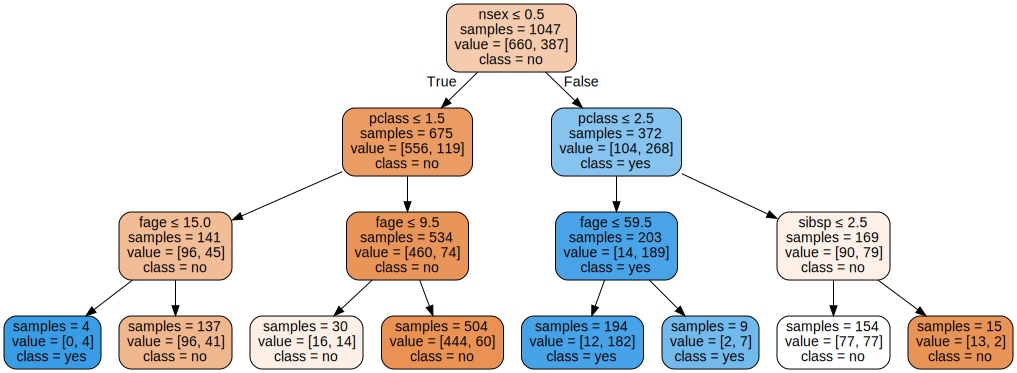

In [88]:
model = sk.tree.DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)

import graphviz
graphviz.backend.dot_command.DOT_BINARY = 'c:/winapp/conda/Library/bin/graphviz/dot.exe'

graphviz.Source(
    sk.tree.export_graphviz(model,feature_names=features,class_names=['no','yes'],
    filled=True, rounded=True, special_characters=True,impurity=False)
)

Видим, что как и в нашем случае пол является главным решающим фактором, после чего наступают более сложные решения. 

### Машина опорных векторов (SVM)

В заключение поговорим о ещё одной линейной модели - машине опорных векторов. Для этого вернёмся к исходной задаче - разделении классов точек на плоскости.

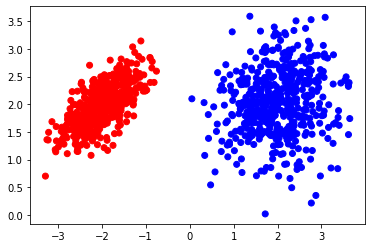

In [89]:
X,Y = sk.datasets.make_classification(
    n_samples=1000,n_features=2,random_state=3,
    n_informative=2,n_redundant=0,
    class_sep=2,n_clusters_per_class=1,flip_y=0)

plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
plt.show()

Идея метода опорных векторов состоит в том, чтобы построить такую разделяющую прямую $w_0x_0+w_1x_1+b=0$, которая бы обеспечивала максимальный "зазор" между разделяемыми классами. Варьируя угол наклона разделяющей прямой мы добиваемся максимального зазора. При этом элементы, на которые "опираются" прямые, называются **опорными векторами**:

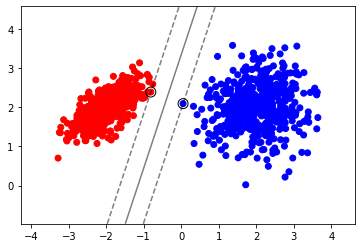

In [90]:
import sklearn.svm, sklearn.inspection

model = sk.svm.SVC(kernel="linear", C=1000)
model.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])

ax = plt.gca()
# строим разделяющие прямые
sk.inspection.DecisionBoundaryDisplay.from_estimator(
    model,X,plot_method="contour",colors="k",
    levels=[-1, 0, 1],alpha=0.5,
    linestyles=["--", "-", "--"], ax=ax)
# обводим опорные вектора
ax.scatter(
    model.support_vectors_[:, 0], model.support_vectors_[:, 1],
    s=100, linewidth=1, facecolors="none", edgecolors="k")

plt.show()

Данный метод похож на логистическую регрессию, но использует другую функцию ошибки, позволяющую уменьшить зазор. За счет того, что при построении разделяющей прямой (или гиперплоскости, в случае большей размерности) используются близлежащие точки - опорные вектора, повышается эффективность метода для большого количества входных обучающих данных.

Для разделения линейно - неразделимых множеств SVM допускает использование нелинейных **функций ядра** (*kernel functions*). Например, если мы будет использовать метод SVM из Scikit Learn по умолчанию, то будут использованы нелинейные функции ядра: 

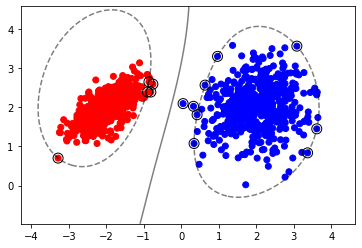

In [91]:
import sklearn.svm, sklearn.inspection

model = sk.svm.SVC()
model.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])

ax = plt.gca()
# строим разделяющие прямые
sk.inspection.DecisionBoundaryDisplay.from_estimator(
    model,X,plot_method="contour",colors="k",
    levels=[-1, 0, 1],alpha=0.5,
    linestyles=["--", "-", "--"], ax=ax)
# обводим опорные вектора
ax.scatter(
    model.support_vectors_[:, 0], model.support_vectors_[:, 1],
    s=100, linewidth=1, facecolors="none", edgecolors="k")

plt.show()

Рассмотрим случай, когда множества точек не являются линейно разделимыми. Такой датасет мы можем сгненерировать при помощи функции `make_circles`:

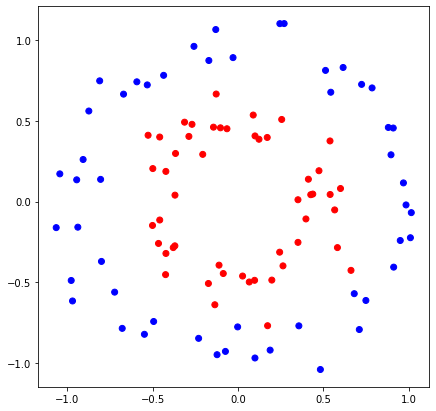

In [92]:
X,Y = sk.datasets.make_circles(n_samples=100,factor=0.5,noise=0.1)
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])
plt.show()

Применим к этому алгоритм опорных вектором с нелинейными ядерными функциями:

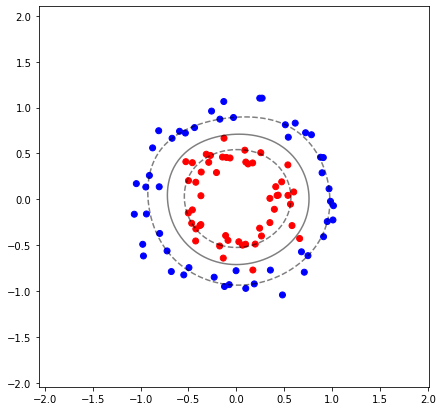

In [93]:
model = sk.svm.SVC()
model.fit(X, Y)

plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])
ax = plt.gca()
# строим разделяющие прямые
sk.inspection.DecisionBoundaryDisplay.from_estimator(
    model,X,plot_method="contour",colors="k",
    levels=[-1, 0, 1],alpha=0.5,
    linestyles=["--", "-", "--"], ax=ax)

plt.show()

Посмотрим на пример, как меняется точность классификации при использовании линейных и нелинейных моделей:

In [94]:
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y,test_size=0.2,shuffle=True)

linmodel = sk.linear_model.LogisticRegression().fit(X_train,Y_train)

print(f"Linear accuracy = {sk.metrics.accuracy_score(Y_test,linmodel.predict(X_test))}")
print(f"Non-lin SVM accuracy = {sk.metrics.accuracy_score(Y_test,model.predict(X_test))}")

Linear accuracy = 0.45
Non-lin SVM accuracy = 1.0


Отметим, что мы можем добиться высокой точности модели, добавив вручную дополнительные признаки в виде квадратов к нашему датасету:

In [95]:
X_train_aug = np.hstack([X_train,X_train*X_train])
X_test_aug = np.hstack([X_test,X_test*X_test])

linaugmodel = sk.linear_model.LogisticRegression().fit(X_train_aug,Y_train)

print(f"Augmented linear accuracy = {sk.metrics.accuracy_score(Y_test,linaugmodel.predict(X_test_aug))}")


Augmented linear accuracy = 1.0


Такого же результата можно было добиться, используя трансформер `PolynomialFeatures`:

In [96]:
import sklearn.pipeline

pipe = sk.pipeline.Pipeline([
    ('PolyTransformer',sk.preprocessing.PolynomialFeatures()),
    ('LinearModel',sk.linear_model.LogisticRegression())
])
pipe.fit(X_train,Y_train)
print(f"Pipeline accuracy = {sk.metrics.accuracy_score(Y_test,pipe.predict(X_test))}")


Pipeline accuracy = 1.0


### Мультиклассовая классификация

В качестве задачи мультиклассовой классификации рассмотрим задачу распознавания рукописных цифр. Для этого используем датасет [MNIST](https://ru.wikipedia.org/wiki/MNIST_(%D0%B1%D0%B0%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)) - это датасет рукописных цифр, подготовленный национальным институтом стандартов США. Но содержит обучающий набор в 60000 рукописных цифр, собранный от 250 различных студентов и сотрудников института, а также тестовый набор из 10000 цифр, собранных от других сотрудников. Каждая цифра представляется матрицей 28x28 точек в 256 градациях серого.


In [97]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X = mnist.data
Y = mnist.target
print(X.shape, Y.shape)

(70000, 784) (70000,)


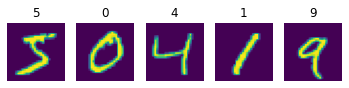

In [98]:
fig,ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(X.iloc[i].to_numpy().reshape(28,28))
    ax[i].axis('off')
    ax[i].set_title(Y[i])
plt.show()

Датасет состоит из 70000 рукописных цифр размерностью 28 на 28 пикселей, в 256 градациях яркости.

Для начала, разобьем датасет на обучаующую и тестовую выборки. Для увеличения скорости будем использовать по 10000 цифр в обучающем и тестовом датасете. Вы можете попробовать использовать весь датасет, но в этом случае приготовьтесь ждать!

In [99]:
X_train, X_test, Y_train, Y_test = \
  sk.model_selection.train_test_split(X,Y,train_size=10000, test_size=10000)

Рассмотренные нами алгоритмы классификации были **бинарными**, поэтому для многоклассовой классификации можно использовать подход **один против всех**. Например, обучим классификатор для обнаружения цифры 0:

In [100]:
Y0_train = Y_train=="0"
Y0_test = Y_test=="0"
model = sk.linear_model.LogisticRegression().fit(X_train,Y0_train)
sk.metrics.accuracy_score(Y0_test,model.predict(X_test))

c:\winapp\conda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9805

Видим здесь важную проблему - алгоритм оптимизации предупреждает, что не удалось достичь сходимости. Это может быть вызвано двумя проблемами:

* Используемый по умолчанию в `LogisticRegression` оптимизатор - это не совсем градиентный спуск, а алгоритм `lbfgs`, который хорошо работает на сравнительно небольших датасетах. Можно попробовать задать другой оптимизатор параметром `solver=...`.
* Cогласно негласному соглашению, входные числовые признаки должны находиться в районе диапазона 0..1 - исходя из этого реализованы все алгоритмы внутри библиотек. Это особенно важно, поскольку во многих случаях признаки имеют различный диапазон (например, рост человека меняется от 30 до 250 см., в то время как возраст - от 0 до 120), и для более *честного* обучения имеет смысл приводить их к единому диапазону. Мы раньше не занимались приведением признаков к диапазону 0..1, поскольку мы не сталкивались с моделями большой размерности. Здесь же мы имеем 768 входов, и значения в интервале 0..255, которые сильно выходят за рамки общепринятого.

Для борьбы с проблемой нормируем все значения в датасете:

In [101]:
model = sk.linear_model.LogisticRegression(solver='newton-cg').fit(X_train/255.0,Y0_train)
sk.metrics.accuracy_score(Y0_test,model.predict(X_test/255.0))

0.9904

Получаем точность около 90% на классификации "ноль-не ноль". Для многоклассовой классификации нам необходимо построить 10 таких моделей, по одной на каждую цифру. Sklearn содержит специальный класс, который позволяет превратить любой двоичный классификатор в мультиклассовый с помощью подхода **One vs. All**:

In [102]:
import sklearn.multiclass

model = sk.multiclass.OneVsRestClassifier(
    sk.linear_model.LogisticRegression(solver='newton-cg',tol=0.1))
model.fit(X_train/255.0, Y_train)
sk.metrics.accuracy_score(Y_test,model.predict(X_test/255.0))

0.9007

Можем посмотреть на матрицу ошибок:

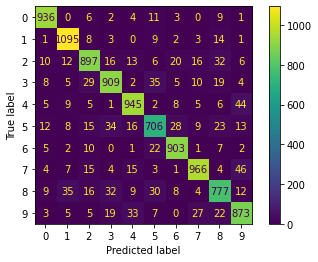

In [103]:
sk.metrics.ConfusionMatrixDisplay.from_estimator(model,X_test/255.0,Y_test)
plt.show()

`OneVsRestClassifier` может превратить любой бинарный классификатор в мультиклассовый. Однако многие классификаторы в SkLearn, включая логистическую регрессию, поддерживают мультиклассовый режим. Поэтому мы можем подавать мультиклассовые данные напрямую на вход `LogisticRegression`:

In [104]:
model = sk.linear_model.LogisticRegression(solver='newton-cg',tol=0.1)
model.fit(X_train/255.0, Y_train)
sk.metrics.accuracy_score(Y_test,model.predict(X_test/255.0))

0.8981

Интересно посмотреть на коэффициенты (веса) получившейся модели. В мультиклассовом случае, размерность вектора коэффициентов `model.coef_` будет $10\times784$ - это соответствует 10 классам, по $768=28\times28$ коэффициентов в каждом. Соответственно, можем попробовать визуализировать это как изображение: 

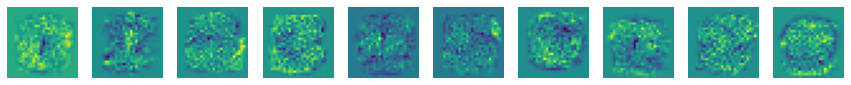

In [105]:
fig,ax = plt.subplots(1,10,figsize=(15,6))
for i in range(10):
    ax[i].imshow(model.coef_[i].reshape(28,28))
    ax[i].axis('off')
plt.show()

Из картинки становится примерно понятно, как работает такой классификатор - он умножает шаблон с коэффициентами на изображение, и выход получается тем больше, чем лучше шаблон совпадает с картинкой. Положительные коэффициенты в шаблоне соответствуют тем пикселям, которые должны присутствовать для данной цифры, а отрицательные - те, которые для такой цифры не характерны.

### Кросс-валидация

Для проверки точности модели мы обычно использовали подход с разбиением выборки на обучающую и тестовую. Однако в этом случае часть выборки "теряется" и не используется для обучения; кроме того - есть вероятность, что конкретное разбиение на обучающую и тестовую выборку оказалось каким-то "неудачным".

Для преодоления этих сложностей может использоваться подход, называемый **кросс-валидацией** (*K-Fold Cross-Validation*). В этом случае датасет разделяется на $k$ частей, и проводится $k$ экспериментов, в которых одна из частей используется для валидации, а остальные - для обучения. Полученные результаты (точность) затем усредняются.

Scikit Learn позволяет провести обучение с кросс-валидацией:

In [ ]:
model = sk.linear_model.LogisticRegression(solver='newton-cg',tol=0.1)
scores = sk.model_selection.cross_val_score(model,X/255.0,Y,cv=5) 
scores

In [ ]:
scores.mean(), scores.std()

В методе `cross_val_score` можно задавать различные метрики для оценки, а также различные стратегии разбиения датасета (с помощью параметра `cv`).

Существует также метод `cross_val_predict`, возвращающий предсказания можели для каждого из элементов входного датасета в то время, когда он был частью тестовой выборки.

Если же нам нужно вернуть сами обученные модели, полученные в процессе кросс-валидации, то можно использовать метод `cross_validate`. Подробнее об особенностях использования этого метода можно почитать [в документации](https://scikit-learn.org/stable/modules/cross_validation.html).

## Кластеризация

Ранее мы рассматривали методы обучения с учителем, где для каждого элемента входных данных было задано ожидаемое значение целевой функции. Однако в некоторых случаях можно обойтись без целевой функции, используя некоторые свойства самого датасета. В этом случае говорят об **обучении без учителя**.

Рассмотрим снова датасет изображений рукописных цифр [MNIST](https://ru.wikipedia.org/wiki/MNIST_(%D0%B1%D0%B0%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)):

In [ ]:
import sklearn as sk
import sklearn.model_selection
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [107]:

mnist = fetch_openml('mnist_784')

X = mnist.data.to_numpy()/255.0
Y = mnist.target.to_numpy().astype(np.uint8)
print(X.shape, Y.shape)

(70000, 784) (70000,)


Мы можем использовать свойста **близости** изображений цифр, чтобы реализовать алгоритм классификации.

### KNN классификаторы

Алгоритм **k ближайших соседей** (*K nearest neighbors*) используется в том случае, если на множестве есть некоторая метрика близости. Для цифр метрикой близости можно считать, например, среднеквадратичную разность между яркостями всех пикселей изображения:

In [108]:
def dist(X,Y):
    return np.sum((X-Y)*(X-Y))

for _ in range(15):
    i,j = np.random.randint(0,len(X),size=2)
    print(f"Distance between {Y[i]} and {Y[j]} is {dist(X[i],X[j])}")

Distance between 7 and 8 is 95.99709342560554
Distance between 8 and 8 is 82.31786236063053
Distance between 0 and 3 is 141.28089196462898
Distance between 1 and 1 is 77.95935409457901
Distance between 9 and 9 is 49.70542099192618
Distance between 7 and 6 is 138.7449903883122
Distance between 3 and 2 is 132.42786620530566
Distance between 6 and 3 is 103.61277970011535
Distance between 7 and 9 is 76.27798539023453
Distance between 2 and 0 is 140.27558631295656
Distance between 1 and 6 is 140.38209919261823
Distance between 6 and 4 is 104.15827758554403
Distance between 7 and 9 is 78.77259515570935
Distance between 1 and 0 is 171.27823144944256
Distance between 8 and 0 is 122.33490196078432


Вы можете запустить этот код несколько раз, он считает расстояние между изображениями случайных цифр. Можно заметить, что расстояния между изображениями одних и тех же цифр стабильно меньше.

Исходя из этого, можно предложить следующий алгоритм классификации входного изображения $I$:

1. Ищем такое изображение $X_i$ из нашего обучающего датасета, что $\mathrm{dist}(X_i,I)\to\min$.
2. В качестве ответа возвращаем метку этого изображения $Y_i$.

> Используем для ускорения работы обучающий датасет из 10000 изображений. Вы можете посмотреть, как программа работает на полном датасете, но приготовьтесь ждать

In [110]:
X_train, X_test, Y_train, Y_test = \
   sk.model_selection.train_test_split(X,Y,train_size=10000, test_size=2000,shuffle=True)

def classify(input_img):
    i = np.argmin([dist(x,input_img) for x in X_train])
    return Y_train[i]

n = 20
correct = 0
for x,y in zip(X_test[:n],Y_test[:n]):
    r = classify(x)
    print(f"{y} classified as {r}")
    correct += (y==r)
print(f"Accuracy: {correct/n}")
    

1 classified as 1
7 classified as 7
0 classified as 0
5 classified as 5
4 classified as 4
1 classified as 1
7 classified as 7
1 classified as 1
1 classified as 1
3 classified as 3
6 classified as 6
5 classified as 1
1 classified as 1
9 classified as 9
0 classified as 0
8 classified as 8
4 classified as 4
5 classified as 3
5 classified as 5
8 classified as 8
Accuracy: 0.9


Нам удалось реализовать классификатор в несколько строчек кода! Это классификатор KNN при K=1.

Для повышения точности можно предложить следующий алгоритм:

1. Выбираем K ближайших по расстоянию цифр к I
2. Из этого множества возвращаем цифру, которая встречается наибольшее число раз

Например, если три ближайшие цифры будут {8,3,3}, то будет возвращено значение 3.

KNN-классификатор также включен в состав библиотеки Scikit Learn:

In [111]:
import sklearn.neighbors

res=[]
for i in range(1,10):
    model = sk.neighbors.KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    acc = sk.metrics.accuracy_score(Y_test,model.predict(X_test))
    print(f"Accuracy for k={i} is {acc}")
    res.append(acc)

Accuracy for k=1 is 0.942
Accuracy for k=2 is 0.927
Accuracy for k=3 is 0.9405
Accuracy for k=4 is 0.9395
Accuracy for k=5 is 0.935
Accuracy for k=6 is 0.9315
Accuracy for k=7 is 0.9335
Accuracy for k=8 is 0.9315
Accuracy for k=9 is 0.9305


Можно заметить, что для некоторого k наблюдается оптимальное значение точности. Поэтому, чтобы получить оптимальную модель для нашего датасета, нужно перебрать несколько значений k. Такая оптимизация называется **оптимизацией гиперпараметров**.

При оптимизации гиперпараметров, чтобы померить "честную" точность модели, нельзя использовать ту же тестовую выборку, что и при оптимизации. Поэтому в таком случае выборку разделяют на три части:
* **Обучающая** используется при обучении моделей
* **Валидационная** используется при оптимизации гиперпараметров
* **Тестовая** используется при финальном тестировании модели

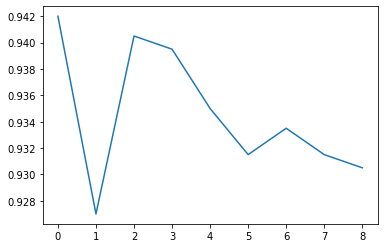

In [112]:
plt.plot(res)
plt.show()

### Кластеризация. Метод k-средних

В случае с KNN мы решали задачу классификации - хотя и ориентировались в первую очередь на расстояния между объектами в пространстве признаков. Но мы можем поставить и другую задачу - как разбить оптимальным образом все изображения цифр в пространстве признаков на некоторые группы? Это и будет **задача кластеризации**, при этом нам не нужно знать, какие цифры соответствуют изображениям.

Наиболее известный алгоритм кластеризации - это алгоритм **k-средних**. Предположим, мы хотим разбить исходное множество объектов $X$ на $k$ непересекающихся кластеров $X_i$, так, чтобы $\bigcup\limits_i X_i = X$ и $X_i\cap X_j=\emptyset$ для $i\neq j$, и чтобы расстояние между объектами в кластерах было минимальным.

Последнее требование может быть заменено требованием, чтобы суммарное расстояние от всех точек кластера $X_i$ до его **центра масс** $c_i$ было минимальным для всех кластеров, т.е.
\begin{equation}
\sum_{i=1}^k \sum_{x\in S_i} (x-c_i)^2 \to \min
\end{equation}

Алгоритм k-средних является итерационным алгоритмом. Изначально центры масс выбираются случайным образом, после чего на каждом шаге происходит перевычисление центров масс и перегруппировка точек внутри кластеров. Алгоритм завершается, когда на очередной шаг не приводит к изменению кластеров.

Используем K-Means для группировки всех изображений рукописных символов на кластеры:

In [113]:
import sklearn.cluster

model = sk.cluster.KMeans(n_clusters=10).fit(X)

В процессе кластеризации вычисляются также значения **центроидов** кластеров. Посмотрим на них:

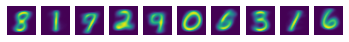

In [114]:
fig,ax = plt.subplots(1,10)
for i,im in enumerate(model.cluster_centers_):
    ax[i].imshow(im.reshape(28,28))
    ax[i].axis('off')
plt.show()

In [115]:
model.labels_

array([0, 5, 4, ..., 2, 6, 9])

Мы видим, что центроиды более-менее соответствуют цифрам, при этом мы сгруппировали похожие символы вместе без какой-либо предварительной разметки. Однако вполне вероятна ситуация, когда какой-то цифре будет соответствовать несколько кластеров, а изображения каких-то двух похожих цифр попадут в один кластер. Это происходит из-за того, что метод k-средних не гарантирует нам получения **глобального минимума** расстояния в формуле (1), а только достижения **локального минимума**.

Для интереса, посмотрим на содержимое одного из кластеров (можете установить значение переменной `c` в соответствии с номером кластера, который хочется исследовать):

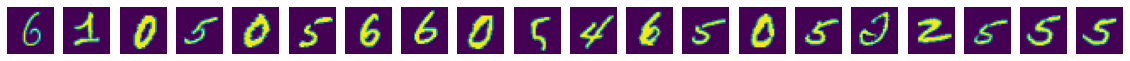

In [116]:
c = 6
res = [ x for x,l in zip(X,model.labels_) if l==c]

fig,ax = plt.subplots(1,20,figsize=(20,5))
for i,im in enumerate(res[:20]):
    ax[i].imshow(im.reshape(28,28))
    ax[i].axis('off')
plt.show()

Чтобы понять подробнее, как работает код выше, посмотрим на значение метода `labels_`:

In [ ]:
print(f"Размер вектора: {model.labels_.shape}")
print(model.labels_[:10])

В этом векторе для каждого элемента из исходного множества $X$ содержится номер соответствующего кластера. По сути дела, имея такие метки мы практически решили задачу классификации - надо лишь установить соответствие номера кластера и цифры. И, по всей видимости, подобрать параметры модели кластеризации, чтобы добиться наилучшего разбиения цифр на кластеры.

#### Пример: основные цвета на фотографии

Рассмотрим такую фотографию:

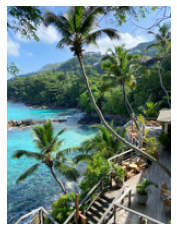

In [117]:
from PIL import Image

img = Image.open("../data/datingscout-u7nxI32spEk-unsplash.jpg")
img = img.resize((150,200))
img = np.array(img)/255.0
plt.imshow(img)
plt.axis('off')
plt.show()

Визуально мы видим, что на ней есть много зелёного (пальмы) и голубого (небо, вода) цветов. Если мы хотим повестить фото так, чтобы оно гармонировало с окружающими цветами, то нужно подбирать цвета из соответствующей цветовой гаммы.
Возникает вопрос – как выделить основные цвета фотографии? Если просто усреднить цвета, результат будет не слишком хорош:


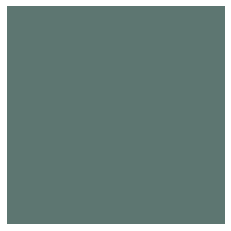

In [118]:
def show_color(c,ax=plt):
    t = np.zeros(shape=(10,10,3))
    t[:] = c
    ax.imshow(t)
    ax.axis('off')
    
show_color(img.mean(axis=(0,1)))

Для выделение индивидуальных цветов можно применить кластеризацию. В этом случае метрикой близости будет естественное евклидово расстояние между RGB-векторами цветов:

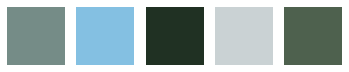

In [120]:
n_clusters = 5

X = img.reshape(-1,3)
km = sk.cluster.KMeans(n_clusters=n_clusters).fit(X)

fig,ax = plt.subplots(1,n_clusters)
for i in range(n_clusters):
    show_color(km.cluster_centers_[i],ax[i])

In [121]:
from tqdm import tqdm

inertias = []
for k in tqdm(range(2,20)):
    km = sk.cluster.KMeans(n_clusters=k).fit(X)
    inertias.append(km.inertia_)

100%|██████████| 18/18 [00:51<00:00,  2.85s/it]


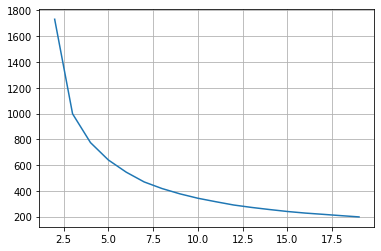

In [122]:
plt.plot(range(2,20),inertias)
plt.grid()

Остаётся вопрос - как в этом случае определить оптимальное число кластеров? Об этом мы поговорим чуть позже.

## Понижение размерности

Метод k-means разбивает наши цифры на кластеры, но при этом наблюдать за этим процессом визуально не представляется возможным, поскольку каждая цифра представляется некоторой точкой в пространстве размерности 784. Для визуального наблюдения за кластеризацией на бы хотелось как-то спроецировать картинку на двумерное пространство.

Такой процесс называется **понижением размерности**. Наиболее известный алгоритм понижения размерности - **[метод главных компонент](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)** (PCA, *Principal Component Analysis*).

Основная идея метода состоит в следующем. Представим себе некоторое множество точек на плоскости размерности 2. Если мы хотим снизить размерность до 1, то это означает, что мы применяем к исходным точкам некоторое преобразование. Например, мы можем смотреть на эти точки под разными углами, проецируя их на прямую. Для того, чтобы "разглядеть" точки получше, нам нужно выбрать такую проекцию, которая будет максимизировать разброс между точками.

Имея произвольное пространство размерности $n$, мы ищем такое направление (которое называется **главной компонентой**), проекция на которое даёт нам пространство размерности $n-1$, в котором разборос точек максимален. Далее мы повторяем процесс, пока не получим пространство необходимой размерности.

Посмотрим, что даёт метод PCA применительно к нашему датасету:

In [123]:
import sklearn.decomposition

X = mnist.data.to_numpy()/255.0

X2 = sk.decomposition.PCA(n_components=2).fit_transform(X)
X2[:10]

array([[ 0.47943195, -1.24008278],
       [ 3.96271734, -1.13707672],
       [-0.23134613,  1.54390087],
       [-3.12535229, -2.38203497],
       [-1.53459036,  2.86198656],
       [ 0.729285  ,  0.87790201],
       [-2.8646548 , -0.63532073],
       [ 1.9744609 , -1.21069224],
       [-3.42961754, -0.33062988],
       [-1.19221884,  1.81790741]])

Мы получили набор векторов размерности 2, соответствующих нашим исходным рукописным цифрам. Поскольку мы знаем принадлежность цифр различным классам, можем построить эти точки на плоскости и посмотреть, насколько действительно одинаковые цифры оказалиcь близко после PCA-преобразования:

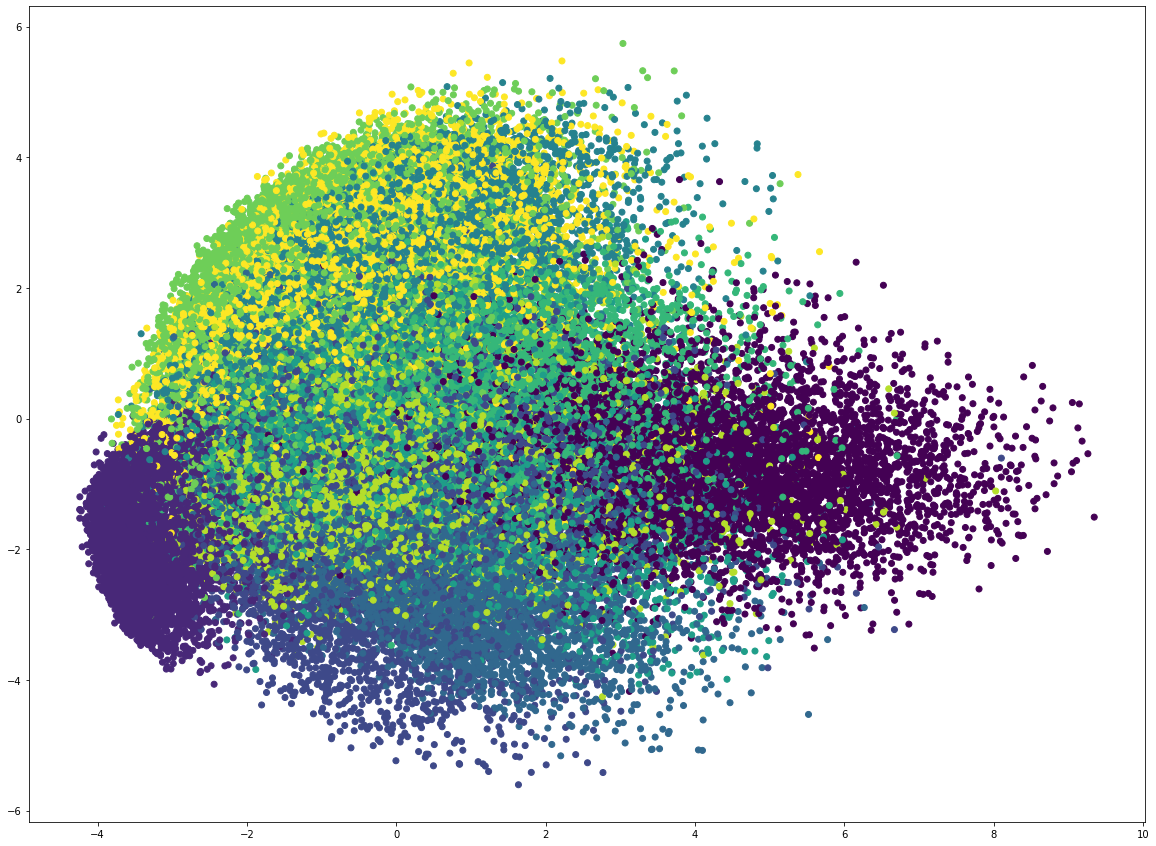

In [124]:
plt.figure(figsize=(20,15))
plt.scatter(X2[:,0],X2[:,1],c=Y)
plt.show()

В целом видно, что одинаковые классы оказываются сгруппированы в похожие кластеры, но при этом есть похожие и непохожие цифры. Посмотрим, как выглядит этот график для цифр 0 и 1:

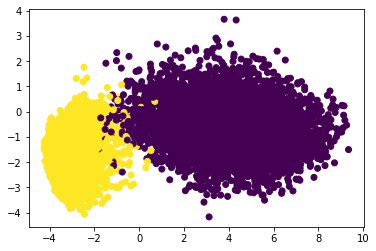

In [125]:
def plot_subset(s):
    tX = np.array([x for x,c in zip(X2,Y) if c in s])
    col = np.array([c for c in Y if c in s])
    plt.scatter(tX[:,0],tX[:,1],c=col)
    plt.show()

plot_subset({0,1})

Видим, что цифры хорошо различимы. Если бы мы применяли логистическую регрессию для классификации, никаких проблем бы не возникло!

Посмотрим теперь на более "похожие" цифры:

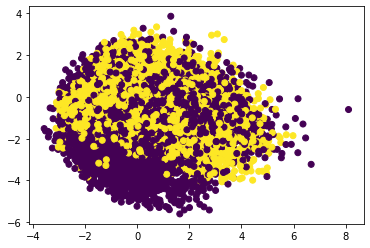

In [126]:
plot_subset({2,5})

Эти цифры уже существенно более "запутаны", и очевидно с их классификацией могут возникнуть проблемы.

Методы снижения размерности оказываются очень полезны для визуализации многомерных данных, чтобы понять, являются ли действительно классы разделимыми. Если мы сталкиваемся с какой-то задачей классификации или кластеризации, можно предварительно провести исследование данных за счет снижения размерности.

## Пример: анализируем страны

В качестве примера исследования данных возьмём [датасет данных по странам](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data), и посмотрим, сможем ли мы сделать какие-то интересные выводы.

In [127]:
import pandas as pd
df = pd.read_csv('../data/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Описание полей из этой таблицы:
* `child_mort` - количество смертей детей до 5 лет, на 1000 чел.
* `exports` - процент валового национального продукта, приходящийся на экспорт
* `health` - процент валового национального продукта, приходящийся на уход за здоровьем
* `imports` - процент валового национального продукта, приходящийся на импорт
* `Income` - доход на душу населения
* `Inflation` - инфляция, рост общего национального продукта год к году
* `life_expec` - средняя продолжительность жизни 
* `total_fer` - количество детей, рожденных в среднем каждой женщиной
* `gdpp` - валовый национальный продукт


In [128]:
df.describe().T[['mean','min','max']]

,mean,min,max
child_mort,38.270060,2.6000,208.00
exports,41.108976,0.1090,200.00
health,6.815689,1.8100,17.90
imports,46.890215,0.0659,174.00
income,17144.688623,609.0000,125000.00
inflation,7.781832,-4.2100,104.00
life_expec,70.555689,32.1000,82.80
total_fer,2.947964,1.1500,7.49
gdpp,12964.155689,231.0000,105000.00


Попробуем применить алгоритм PCA, чтобы понять, есть ли в странах какие-то естественные группировки:

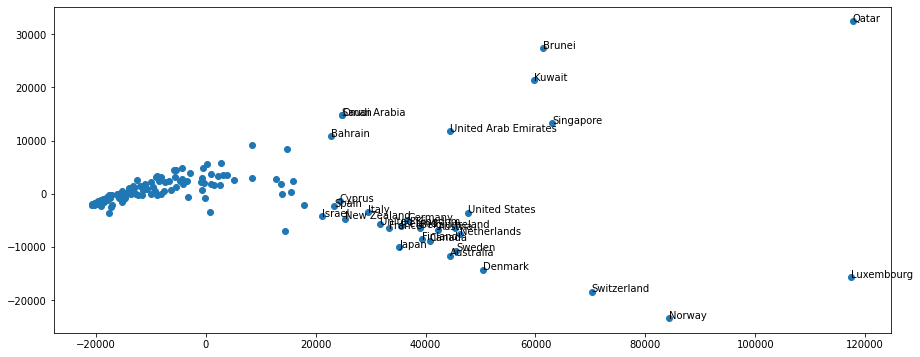

In [129]:
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

names = df['country']
res = sk.decomposition.PCA(n_components=2).fit_transform(df[features])
plt.figure(figsize=(15,6))
plt.scatter(res[:,0],res[:,1])
for n,x,y in zip(names,res[:,0],res[:,1]):
    if x>20000 or y>10000:
        plt.annotate(n,(x,y))
plt.show()

Видно, что некоторые страны сильно выделяются из общего множества. Чтобы понять, какие это страны, мы аннотируем те точки, которые находятся в более-менее свободной части графика.

Учитывая, что мы получили очень большие значение после преобразования, мы можем прийти к заключению, что хорошо бы отмасштабировать все признаки перед тем, как делать преобразование координат. Для этого можем использовать стандартное средство SkLearn:

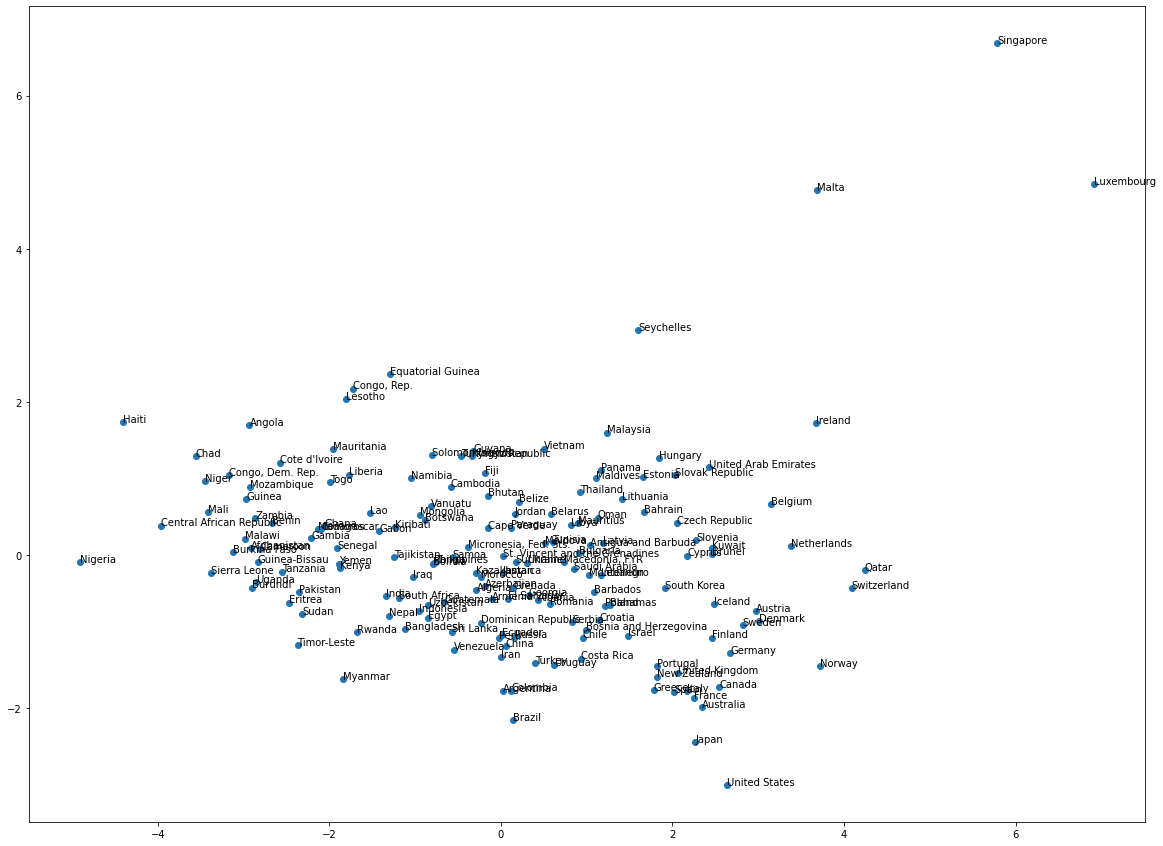

In [130]:
scaler = sk.preprocessing.StandardScaler()
dfs = scaler.fit_transform(df[features])

res = sk.decomposition.PCA(n_components=2).fit_transform(dfs)
plt.figure(figsize=(20,15))
plt.scatter(res[:,0],res[:,1])
for n,x,y in zip(names,res[:,0],res[:,1]):
    if True or y>2.5 or x<-4 or x>3:
        plt.annotate(n,(x,y))
plt.show()

Видим, что равномерность расположения точек стала несколько лучше, и по-прежнему выделаются те же страны (но, возможно, они находятся в другом месте, т.к. PCA не гарантирует каждый раз получение одной и той же системы координат).

Попробуем провести кластеризацию. Однако возникает вопрос - на сколько кластеров разбивать множество стран? Чтобы понять это, обычно делают несколько попыток, и смотрят на параметр **инерции** - это как раз та самая сумма расстояний до центроидов, которую мы видели в уравнении (1):

c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

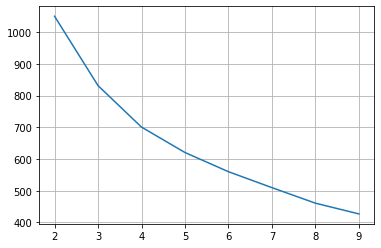

In [131]:
inertias = []
for k in range(2,10):
    km = sk.cluster.KMeans(n_clusters=k).fit(dfs)
    inertias.append(km.inertia_)

plt.plot(range(2,10),inertias)
plt.grid()

Часто бывает так, что после какого-то значения k наступает перелом в графике, после которого инерция уже не сильно снижается. В этом случае такое значение как раз можно считать оптимальным. В нашем случае можно выбрать значение 4 или 5:

In [132]:
nclusters = 5
km = sk.cluster.KMeans(n_clusters=nclusters).fit(dfs)
km.labels_

c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1,
       2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 3, 2,
       3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2,
       1, 2, 3, 2, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       3, 3, 1, 4, 3, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 3, 1, 1, 3, 3, 2, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1])

In [133]:
pd.DataFrame(scaler.inverse_transform(km.cluster_centers_),columns=features)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
1,90.793617,29.661915,6.462553,43.680851,3870.702128,9.951809,59.212766,4.974043,1900.255319
2,21.311628,41.197547,6.208953,47.653092,13098.720930,7.420477,73.066279,2.263837,6984.558140
3,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


Найдем типичных представителей каждого из кластеров. Координаты центроидов не соответствуют конкретным точкам из датасета (странам), поэтому нам надо найти ближайшие к ним точки:

In [134]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, dfs)
names[closest]

133    Singapore
94        Malawi
143     Suriname
53       Finland
113      Nigeria
Name: country, dtype: object

Чтобы проделать дальнейший анализ данных, мы можем добавить информацию о кластере в исходный датафрейм:

In [135]:
df['cluster'] = km.labels_
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


Посмотрим на средние значения параметров по кластерам:

In [136]:
d = { x : 'mean' for x in features }
d['country'] = ', '.join

res = df.groupby('cluster').agg(d)
res

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
cluster,,,,,,,,,,
0,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,"Luxembourg, Malta, Singapore"
1,90.793617,29.661915,6.462553,43.680851,3870.702128,9.951809,59.212766,4.974043,1900.255319,"Afghanistan, Angola, Benin, Botswana, Burkina ..."
2,21.311628,41.197547,6.208953,47.653092,13098.720930,7.420477,73.066279,2.263837,6984.558140,"Albania, Algeria, Antigua and Barbuda, Argenti..."
3,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333,"Australia, Austria, Belgium, Brunei, Canada, C..."
4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000,Nigeria


Можем посмотреть на интересные закономерности: например, как зависит продолжительность жизни от процента расходов на здоровье:

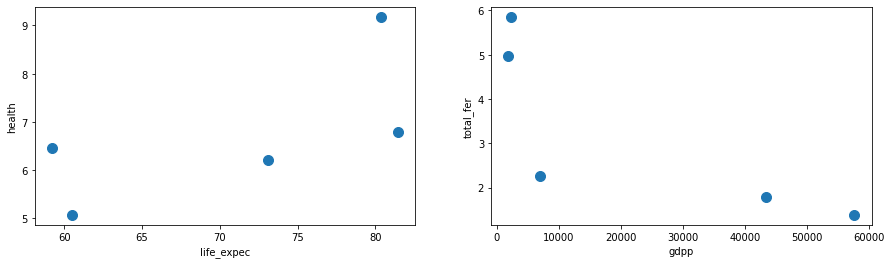

In [137]:
fig,ax = plt.subplots(1,2,figsize=(15,4)) 
res.plot.scatter('life_expec','health',s=100,ax=ax[0])
res.plot.scatter('gdpp','total_fer',s=100,ax=ax[1])
plt.show()

В заключение посмотрим на все группы стран:

In [138]:
for c,all in zip(res.index,res['country']):
    print(f"== Cluster: {c} ==\n{all}")

== Cluster: 0 ==
Luxembourg, Malta, Singapore
== Cluster: 1 ==
Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Pakistan, Rwanda, Senegal, Sierra Leone, Solomon Islands, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia
== Cluster: 2 ==
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Czech Republic, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Jamaica, Jordan, Kazakhstan, Kyrgyz 

**Упражнение**:
1. Поэкспериментируйте с другим числом кластеров и посмотрите, какие страны получаются
1. Попробуйте кластеризацию без предварительного масштабирования и сравните результаты
1. Попробуете использовать `MinMaxScaler` для масштабирования и сравните результаты
1. Реализуйте масштабирование признаков и кластеризацию в виде единого пайплайна (подсказка - используйте `ColumnTransformer` для масштабирования только числовых фич)